In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data
data = {
    "hours": [1, 2, 3, 4, 5],
    "Exam_score": [18, 30, 67, 88, 109]
}
df = pd.DataFrame(data)

# Reshaping the 'hours' data to 2D (n_samples, n_features)
X = np.array(df['hours']).reshape(-1, 1)
y = df['Exam_score']

# Creating Linear Regression model and fitting the data
lr = LinearRegression()
lr.fit(X, y)

# Print coefficient and intercept
print(f"Coefficient from Sklearn: {lr.coef_}")
print(f"Intercept from Sklearn: {lr.intercept_}")

# Gradient Descent implementation
# Initialize slope (m) and intercept (b) to zero
m = lr.coef_[0] 
b = lr.intercept_  
# Hyperparameters
learning_rate = 0.06
epochs = 10

# Number of data points
n = len(X)

# Gradient Descent Loop
for _ in range(epochs):
    # Predicted values based on current m and b
    y_pred = m * X.flatten() + b
    
    # Compute gradients
    dm = (-2/n) * sum(X.flatten() * (y - y_pred))  # derivative wrt m
    db = (-2/n) * sum(y - y_pred)                  # derivative wrt b
    
    # Update parameters
    m = m - learning_rate * dm
    b = b - learning_rate * db

# Final model parameters from Gradient Descent
print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")

# Predicted values using the final model from Gradient Descent
y_pred = m * X.flatten() + b
print(f"Predicted Exam Scores: {y_pred}")


Coefficient from Sklearn: [24.]
Intercept from Sklearn: -9.600000000000001
Final slope (m): 24.0
Final intercept (b): -9.600000000000001
Predicted Exam Scores: [ 14.4  38.4  62.4  86.4 110.4]


In [3]:
house_data = {
    "size": [1500, 1600, 1700, 1800, 1900],
    "bedrooms": [3, 3, 3, 4, 4],
    "age": [10, 15, 20, 25, 30],
    "price": [300000, 320000, 340000, 360000, 380000]
}
house_df = pd.DataFrame(house_data)

X_house = house_df[['size', 'bedrooms', 'age']]
y_house = house_df['price']

# Creating Linear Regression model and fitting the data
lr_house = LinearRegression()
lr_house.fit(X_house, y_house)

# Print coefficient and intercept
print(f"Coefficients from Sklearn: {lr_house.coef_}")
print(f"Intercept from Sklearn: {lr_house.intercept_}")

# Predicting house prices using the fitted model
house_predictions = lr_house.predict(X_house)
print(f"Predicted House Prices: {house_predictions}")

Coefficients from Sklearn: [ 1.99501247e+02 -1.95399252e-14  9.97506234e+00]
Intercept from Sklearn: 648.3790523692733
Predicted House Prices: [300000. 320000. 340000. 360000. 380000.]


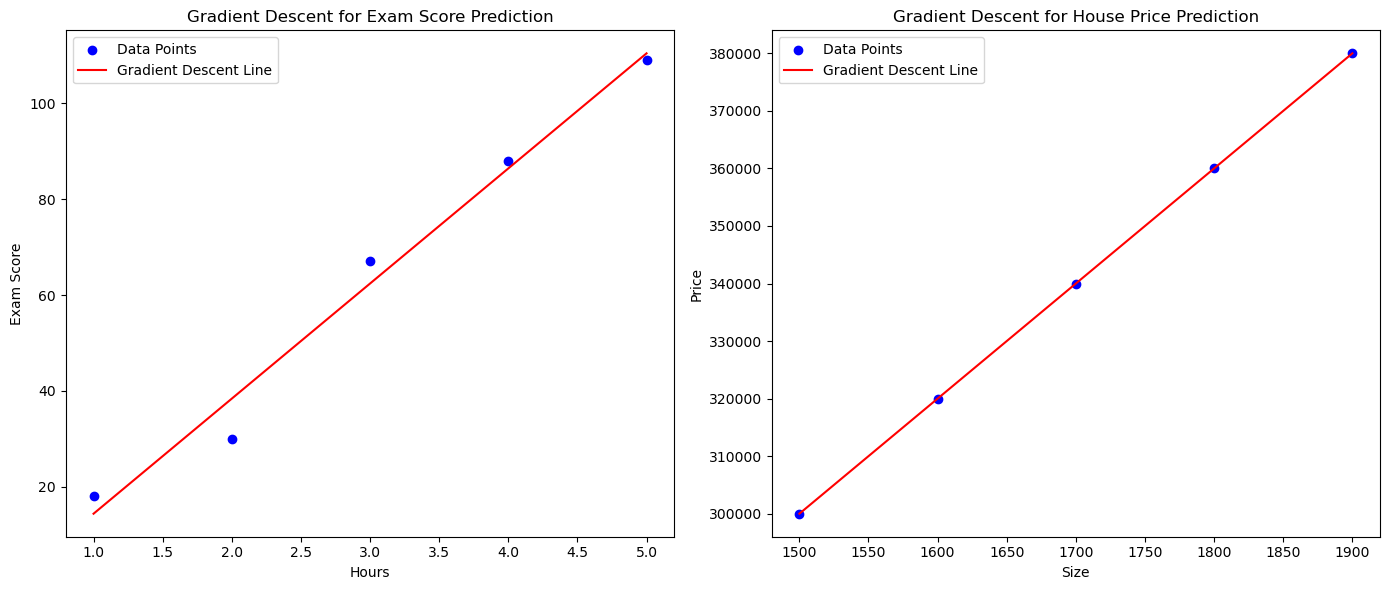

In [4]:
import matplotlib.pyplot as plt

# Plotting the gradient descent for the first model (Exam score prediction)
plt.figure(figsize=(14, 6))

# Plotting the data points
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Gradient Descent Line')
plt.title('Gradient Descent for Exam Score Prediction')
plt.xlabel('Hours')
plt.ylabel('Exam Score')
plt.legend()

# Plotting the gradient descent for the second model (House price prediction)
plt.subplot(1, 2, 2)
plt.scatter(house_df['size'], y_house, color='blue', label='Data Points')
plt.plot(house_df['size'], house_predictions, color='red', label='Gradient Descent Line')
plt.title('Gradient Descent for House Price Prediction')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()